# 2. 检验方法适用条件的考察

## 2.1 独立性

    1.其它非研究因素的影响基本可以等同于随机误差
    2.非独立导致数据方差估计不准确
    3.很严重的数据非独立也会使参数估计出现偏差

## 2.2 正态性

### 2.2.1 正态性的假设检验

    1.KS检验
        考察H0理论分布下累计相对频数和实际频数间的差异
        取频数差值绝对值的最大值为统计量
        结论比较严格
    2.SW检验
        基于数据的偏度系数和峰度系数进行正态性偏离程度的检验
        相对KS检验而言结果更稳妥一些
    3.固有缺陷
        样本量偏低时往往过于迟钝
        样本量较大会过敏，结论往往失去实用价值

In [1]:
# 导入数据
import pandas as pd
DATA_PATH = "./CCSS_sample.xlsx"
ccss = pd.read_excel(DATA_PATH, sheet_name=0)

### 2.2.2 正态性考察Python

<AxesSubplot:ylabel='Frequency'>

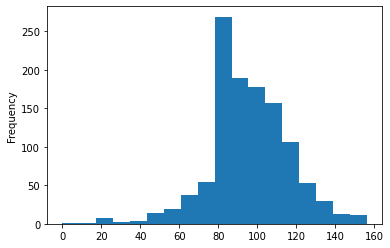

In [2]:
ccss.index1.plot.hist(bins=18)

<AxesSubplot:>

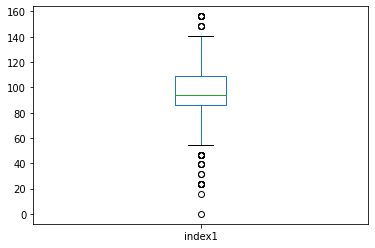

In [3]:
ccss.index1.plot.box()

In [4]:
# 用假设检验考察正态性
import scipy.stats as ss
ss.kstest(ccss.index1,cdf="norm")

KstestResult(statistic=0.999128160418483, pvalue=0.0)

In [5]:
# 分组考察正态性
ks = lambda x: ss.kstest(x,cdf="norm")
ccss.groupby("time").index1.apply(ks)

time
200704                   (1.0, 0.0)
200712    (0.9967105263157895, 0.0)
200812                   (1.0, 0.0)
200912                   (1.0, 0.0)
Name: index1, dtype: object

In [6]:
ss.shapiro(ccss.index1)

ShapiroResult(statistic=0.9748406410217285, pvalue=3.128693051163145e-13)

## 2.3 方差齐性

    一般而言，只要最大/最小方差之比小于3，分析结果都是稳定的

### 2.3.1 方差齐性考察 

    1.分组箱图可以看出几组数据的离散程度，极端值分布情况等
    2.假设检验
        bartletts检验，基于服从正态分布的假设，数据略微偏离正态分布时，检验结果会出现较大偏差
        levene检验 可作为标准的方差齐性检验方法

array([[<AxesSubplot:title={'center':'200704'}>,
        <AxesSubplot:title={'center':'200712'}>],
       [<AxesSubplot:title={'center':'200812'}>,
        <AxesSubplot:title={'center':'200912'}>]], dtype=object)

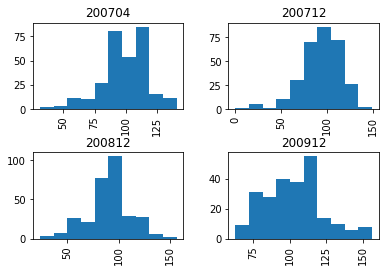

In [7]:
# 图形考察方差齐性
ccss.index1.hist(by=ccss.time)

<AxesSubplot:title={'center':'index1'}, xlabel='time'>

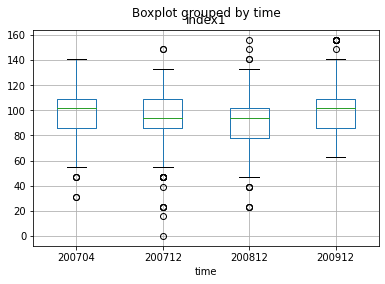

In [8]:
ccss.boxplot(column="index1",by="time")

In [10]:
# 假设检验
ss.bartlett(ccss.index1[ccss.time==200704],
            ccss.index1[ccss.time==200712],
            ccss.index1[ccss.time==200812],
            ccss.index1[ccss.time==200912]
           )

BartlettResult(statistic=11.123818483344097, pvalue=0.011074841431975263)

In [11]:
ss.levene(ccss.index1[ccss.time==200704],
            ccss.index1[ccss.time==200712],
            ccss.index1[ccss.time==200812],
            ccss.index1[ccss.time==200912])

LeveneResult(statistic=2.2068913639343792, pvalue=0.08563270755698366)